In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import copy
import numpy as np

In [285]:
data = pd.read_csv('instance/captANOR150_7_4.dat',sep='\s+',header=None)
data = data.drop(index=0)
data = data.iloc[:,1:3]
data.reset_index(drop=True)

,1,2
0,0.00,0.00
1,0.01,2.15
2,0.85,5.11
3,3.87,5.54
4,2.86,5.41
...,...,...
146,4.70,3.82
147,4.11,3.04
148,5.04,2.29
149,6.17,6.60


In [286]:
N = data.shape[0]

In [287]:
data.iloc[N-1,1] = data.iloc[N-1,1][:-1]

In [288]:
data = data.astype(float)

In [289]:
data.iloc[0,0]

0.0

In [290]:
Rcapt = 1
Rcom = 1

coord_target_dict = {}
for i in range(0, N):
    coord_target_dict[i] = [data.iloc[i,0],data.iloc[i,1]]

print(coord_target_dict)
list_capt = []
list_target = np.arange(0, N)



{0: [0.0, 0.0], 1: [0.01, 2.15], 2: [0.85, 5.11], 3: [3.87, 5.54], 4: [2.86, 5.41], 5: [6.01, 6.57], 6: [4.9, 6.18], 7: [1.35, 6.4], 8: [4.85, 6.58], 9: [1.61, 3.78], 10: [4.78, 2.58], 11: [3.48, 2.48], 12: [5.57, 0.61], 13: [1.63, 2.7], 14: [2.75, 5.49], 15: [1.4, 1.67], 16: [0.45, 3.08], 17: [3.43, 3.45], 18: [1.51, 4.53], 19: [3.69, 1.97], 20: [1.45, 0.47], 21: [2.85, 3.57], 22: [3.72, 4.7], 23: [2.13, 3.76], 24: [2.29, 6.59], 25: [3.79, 1.98], 26: [2.09, 3.82], 27: [3.88, 6.87], 28: [5.97, 2.11], 29: [2.12, 3.72], 30: [5.89, 0.79], 31: [6.51, 6.33], 32: [1.81, 5.65], 33: [2.3, 5.57], 34: [1.6, 1.03], 35: [3.87, 5.25], 36: [0.99, 5.8], 37: [2.91, 5.34], 38: [6.65, 6.22], 39: [1.37, 0.12], 40: [2.12, 0.29], 41: [3.94, 0.51], 42: [1.21, 4.84], 43: [4.55, 6.36], 44: [1.71, 0.58], 45: [6.24, 5.0], 46: [4.47, 1.85], 47: [1.42, 4.58], 48: [1.56, 1.37], 49: [2.91, 2.11], 50: [6.04, 0.55], 51: [3.23, 4.08], 52: [3.1, 4.66], 53: [5.21, 2.32], 54: [3.37, 4.28], 55: [6.23, 4.87], 56: [0.51, 4.

In [291]:
def dist_capt(coord1, coord2):
    return np.sqrt((coord1[0]-coord2[0])**2 + (coord1[1]-coord2[1])**2)



In [292]:
def graph_dist(list_target,coord_target):
    graph = np.zeros((len(list_target),len(list_target)))
    for i in range(len(list_target)):
        for j in range(len(list_target)):
            if i!=j:
                graph[i,j] = dist_capt(coord_target_dict[i], coord_target_dict[j])
    return graph

table_dist = graph_dist(list_target,coord_target_dict)
# print(table_dist)
# print(coord_target_dict.values())
#available_capt = coord_target_dict.values()



list_neighbors = []
dist_neighbors = []
number_neighbors=[]



for i in range(N):

    list_neighbors.append([])
    dist_neighbors.append([])
    for (j,target_neigh) in enumerate(list_target):
    
        if i!=j:
            if table_dist[i,j] <= Rcapt:
                
                list_neighbors[i].append(target_neigh)
                dist_neighbors[i].append(table_dist[i,j])



[[0.         2.15002326 5.18021235 ... 5.53585585 9.03487133 6.82718829]
 [2.15002326 0.         3.07688154 ... 5.03194793 7.59921706 4.74140275]
 [5.18021235 3.07688154 0.         ... 5.05059402 5.52471719 1.66688332]
 ...
 [5.53585585 5.03194793 5.05059402 ... 0.         4.45567054 5.69640237]
 [9.03487133 7.59921706 5.52471719 ... 4.45567054 0.         4.76067222]
 [6.82718829 4.74140275 1.66688332 ... 5.69640237 4.76067222 0.        ]]
dict_values([[0.0, 0.0], [0.01, 2.15], [0.85, 5.11], [3.87, 5.54], [2.86, 5.41], [6.01, 6.57], [4.9, 6.18], [1.35, 6.4], [4.85, 6.58], [1.61, 3.78], [4.78, 2.58], [3.48, 2.48], [5.57, 0.61], [1.63, 2.7], [2.75, 5.49], [1.4, 1.67], [0.45, 3.08], [3.43, 3.45], [1.51, 4.53], [3.69, 1.97], [1.45, 0.47], [2.85, 3.57], [3.72, 4.7], [2.13, 3.76], [2.29, 6.59], [3.79, 1.98], [2.09, 3.82], [3.88, 6.87], [5.97, 2.11], [2.12, 3.72], [5.89, 0.79], [6.51, 6.33], [1.81, 5.65], [2.3, 5.57], [1.6, 1.03], [3.87, 5.25], [0.99, 5.8], [2.91, 5.34], [6.65, 6.22], [1.37, 

In [293]:
is_taken = dict.fromkeys(coord_target_dict.keys(), 0)
is_taken[0] = 2

# Add the list of neighbors for each key
for key, neighbors in enumerate(list_neighbors):
    
    is_taken[key] = [is_taken[key], neighbors, dist_neighbors[key], is_taken[key]]


#print(is_taken)

{0: [2, [71], [0.5894064811316551], 2], 1: [0, [67, 95, 109, 123, 125, 130], [0.5333854141237835, 0.965090669315583, 1.0, 0.21095023109728983, 0.718679344353238, 0.39395431207184417], 0], 2: [0, [18, 36, 42, 47, 56, 135], [0.8786353054595519, 0.7040596565632768, 0.4500000000000003, 0.7783315488916019, 0.604648658313239, 0.6835202996254023], 0], 3: [0, [22, 35, 37, 62, 73, 104, 105, 113, 138], [0.8532877591996734, 0.29000000000000004, 0.980612053770501, 0.574282160614449, 0.8065358020571685, 0.818413098624405, 0.9453041838477173, 0.9202173656261872, 0.8372574275573793], 0], 4: [0, [14, 33, 37, 52, 75, 102, 104, 110, 138, 139, 142], [0.13601470508735436, 0.5824087911424416, 0.08602325267042665, 0.7874642849044013, 0.5044799302251778, 0.7826237921249259, 0.9651942809610922, 0.5603570290448762, 0.30000000000000027, 0.25, 0.9330058949438637], 0], 5: [0, [31, 38, 78, 100, 117, 133, 143, 149], [0.554616984954482, 0.7294518489934761, 0.5930430001273093, 0.05099019513592763, 0.8487638069569177,

In [294]:
is_covered = dict.fromkeys(coord_target_dict.keys(), 0)
is_covered[0] = 2

for key, neighbors in enumerate(list_neighbors):
    is_covered[key] = [is_covered[key],neighbors, dist_neighbors[key]]
#is_covered

{0: [2, [71], [0.5894064811316551]],
 1: [0,
  [67, 95, 109, 123, 125, 130],
  [0.5333854141237835,
   0.965090669315583,
   1.0,
   0.21095023109728983,
   0.718679344353238,
   0.39395431207184417]],
 2: [0,
  [18, 36, 42, 47, 56, 135],
  [0.8786353054595519,
   0.7040596565632768,
   0.4500000000000003,
   0.7783315488916019,
   0.604648658313239,
   0.6835202996254023]],
 3: [0,
  [22, 35, 37, 62, 73, 104, 105, 113, 138],
  [0.8532877591996734,
   0.29000000000000004,
   0.980612053770501,
   0.574282160614449,
   0.8065358020571685,
   0.818413098624405,
   0.9453041838477173,
   0.9202173656261872,
   0.8372574275573793]],
 4: [0,
  [14, 33, 37, 52, 75, 102, 104, 110, 138, 139, 142],
  [0.13601470508735436,
   0.5824087911424416,
   0.08602325267042665,
   0.7874642849044013,
   0.5044799302251778,
   0.7826237921249259,
   0.9651942809610922,
   0.5603570290448762,
   0.30000000000000027,
   0.25,
   0.9330058949438637]],
 5: [0,
  [31, 38, 78, 100, 117, 133, 143, 149],
  [0.554

In [295]:

indices_less_than_R = np.where(table_dist[1] < Rcapt)
#print(indices_less_than_R)
#print(list_neighbors)


[[71], [67, 95, 109, 123, 125, 130], [18, 36, 42, 47, 56, 135], [22, 35, 37, 62, 73, 104, 105, 113, 138], [14, 33, 37, 52, 75, 102, 104, 110, 138, 139, 142], [31, 38, 78, 100, 117, 133, 143, 149], [8, 43, 62, 73, 105, 113, 117, 133, 143], [24, 32, 36, 61, 77, 103, 111, 118, 120, 121, 150], [6, 43, 62, 64, 105, 117, 133, 143], [18, 23, 26, 29, 47, 65, 68, 72, 80, 98, 99, 144], [46, 53, 81, 83, 92, 101, 127, 147, 148], [17, 19, 25, 49, 66, 81, 87, 114, 122, 140, 147], [30, 50, 57, 76, 108, 112], [65, 84, 98, 106, 109, 145], [4, 32, 33, 37, 52, 75, 102, 104, 110, 138, 139, 142], [34, 48, 67, 86, 96, 109, 119, 125, 126, 145], [65, 97, 98, 123], [11, 21, 51, 54, 66, 87, 114, 136, 140, 147], [2, 9, 23, 26, 42, 47, 68, 72, 80, 99, 135, 144], [11, 25, 46, 49, 81, 114, 122], [34, 39, 40, 44, 48, 86, 88, 93, 96, 116, 126], [17, 23, 26, 29, 51, 54, 66, 80, 87, 99, 136, 140], [3, 35, 51, 52, 54, 75], [9, 18, 21, 26, 29, 65, 68, 72, 80, 84, 99, 136, 142, 144], [7, 61, 63, 74, 77, 102, 103, 110, 111

In [296]:
def number_covered(is_taken, key):
    nb_capts = 0
    for x in is_taken[key][1]:
        
        if is_taken[x][0] == 1:
            nb_capts += 1
    if is_taken[key][0] == 1:
        nb_capts += 1
    return nb_capts

In [297]:
def gloutonne1(graph, is_taken, Rcapt, coord_target_dict, Rcom, list_neighbors, k):
    graph_copy= graph
    n = int(np.sqrt(len(graph)))
    print(n)

    for i in range(N-1, 0, -1):

        # If there are indices less than R, find the maximum among those values
        indices_less_than_R = is_taken[i][1]

        # if len(indices_less_than_R) > 0:
        k1 = number_covered(is_taken, i)
        print(k1, k)
        
        while k1 < k:

            max_value_below_R = np.max(graph_copy[i][indices_less_than_R])
            if max_value_below_R == 0:
                raise ValueError("There are no values below R.")
            max_index_below_R = np.argmax(graph_copy[i] == max_value_below_R)

            graph_copy[i,max_index_below_R] = 0
            if is_taken[max_index_below_R][0] == 0:
                is_taken[max_index_below_R][0] = 1
                k1+=1
        
        if k1>=k:
            is_taken[i][3] = 1
        
        if number_covered(is_taken,0) <= 0:
            voisin_puits = is_taken[0][1][0]
            is_taken[voisin_puits][0] = 1
    
            
        # else:
        #     print("There are no values below R.")

        list_capt.append(i)

In [299]:
gloutonne1(table_dist, is_taken, Rcapt, coord_target_dict, Rcom, list_neighbors, 2)


12
0 2
0 2
0 2
0 2
1 2
0 2
0 2
1 2
0 2
2 2
1 2
1 2
2 2
1 2
1 2
3 2
1 2
3 2
0 2
2 2
0 2
0 2
2 2
4 2
4 2
3 2
1 2
1 2
1 2
1 2
1 2
3 2
2 2
5 2
0 2
2 2
2 2
3 2
2 2
1 2
4 2
2 2
1 2
1 2
1 2
3 2
2 2
4 2
3 2
3 2
3 2
5 2
4 2
2 2
3 2
3 2
3 2
2 2
4 2
2 2
2 2
2 2
2 2
2 2
4 2
2 2
3 2
3 2
0 2
1 2
5 2
0 2
5 2
4 2
2 2
2 2
2 2
3 2
5 2
3 2
1 2
2 2
4 2
3 2
2 2
6 2
0 2
3 2
4 2
4 2
1 2
2 2
2 2
3 2
1 2
1 2
2 2
5 2
2 2
2 2
2 2
1 2
5 2
4 2
2 2
2 2
5 2
3 2
4 2
2 2
3 2
3 2
3 2
4 2
4 2
2 2
7 2
3 2
3 2
3 2
3 2
5 2
2 2
2 2
5 2
0 2
3 2
5 2
1 2
4 2
6 2
2 2
5 2
5 2
2 2
5 2
4 2
2 2
2 2
5 2
5 2
5 2
4 2
4 2
4 2
3 2
4 2
4 2
3 2
1 2


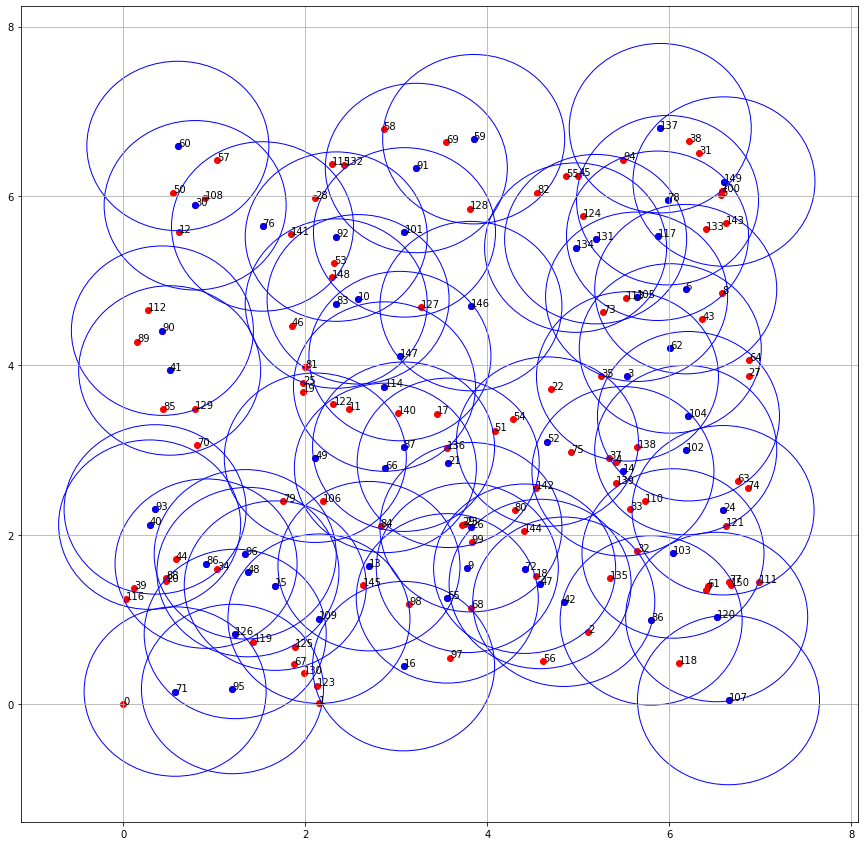

In [302]:
import matplotlib.patches as patches

plt.figure(figsize=(15,15))
plt.grid()
plt.scatter([coord_target_dict[i][1] for i in range(N)], [coord_target_dict[i][0] for i in range(N)], c='r')
#plt.imshow(table_dist)
for i in range(N):
    if is_taken[i][0] == 1:
        plt.scatter(coord_target_dict[i][1], coord_target_dict[i][0], c='b')
        circle = patches.Circle((coord_target_dict[i][1], coord_target_dict[i][0]), radius=1, edgecolor='b', facecolor='none')
        plt.gca().add_patch(circle)
    plt.annotate(str(i), (coord_target_dict[i][1], coord_target_dict[i][0]))
#plt.angle_spectrum()
plt.show()

In [303]:

#np.partition(table_dist[i], -2)[-2:]
def gloutonne(graph, is_taken, Rcapt, coord_target_dict, Rcom, list_neighbors, k):
    graph_copy= graph
    n = len(list_target)

    for i in range(n, 0, -1):

        # If there are indices less than R, find the maximum among those values
        indices_less_than_R = np.where(graph_copy[i] < Rcapt)

        for j in range(n, -1, -1):  

            if len(indices_less_than_R[0]) > 0:
                for l in range(k):

                    max_value_below_R = np.max(is_taken[i][indices_less_than_R])
                    max_index_below_R = np.argmax(graph_copy[i] == max_value_below_R)
                    graph_copy[i,max_index_below_R]=0
                    print(max_value_below_R)
            else:
                print("There are no values below R.")

        list_capt.append(i)

In [304]:
def numpy_from_dict(dict_individu,N):
    vect = np.array([ value[0] for _,value in  dict_individu.items() ])
    vect = vect[1:]
    return vect

In [305]:
def dict_from_numpy(binary_vect,N):
    dict_individu = copy.deepcopy(is_taken)
    for index in range(1,N):
        dict_individu[index][0] = binary_vect[index-1]
    
    return dict_individu

In [306]:
def number_capt(is_taken):
    total_number_capt = 0
    for _,value in is_taken.items(): 
        #si c'est un capteur
        if value[0] == 1:
            total_number_capt+=1

    return total_number_capt

In [307]:
def croisement(b1,b2):

    length = b1.size()
    cut = np.random.randint(length)
    b1_copy = b1.copy()
    b2_copy = b2.copy()
    b1_copy[cut:] = b2[cut:]
    b2_copy[cut:] = b1[cut:]

    return b1_copy, b2_copy

In [308]:
#On vérifie que le vosinage obtenu est encore valide
def verif(index,is_taken,k):
    if number_covered(is_taken,index)< k:
        return False
    for index_voisin in is_taken[index][1]:
        if number_covered(is_taken,index_voisin) < k:
            return False
    return True

In [309]:
def random_remove(is_taken,N,k,max_tentatives=1000):
    count = 0
    while(True):
        count += 1
        int_rand = np.random.randint(N-1) + 1 #Pour éviter 0
        while is_taken[int_rand][0] == 0:
            int_rand = np.random.randint(N-1) + 1 #Pour éviter 0
        
        is_taken[int_rand][0] = 0

        if verif(int_rand,is_taken,k):
            return None
        else:
            is_taken[int_rand][0] = 1
        if(count>=max_tentatives):
            print("Rien trouvé en %d tentatives" % max_tentatives)
            return None

In [310]:
def random_swap(is_taken,N,k,max_tentatives=1000):
    count = 0
    while(True):
        count += 1
        int_rand_capt = np.random.randint(N-1) + 1 #Pour éviter 0
        while is_taken[int_rand_capt][0] == 0:
            int_rand_capt = np.random.randint(N-1) + 1 #Pour éviter 0
        
        int_rand_free = np.random.randint(N-1) + 1 #Pour éviter 0
        while is_taken[int_rand_free][0] == 1:
            int_rand_free = np.random.randint(N-1) + 1 #Pour éviter 0

        is_taken[int_rand_capt][0] = 0
        
        if verif(int_rand_capt,is_taken,k):
            is_taken[int_rand_free][0] = 1
            return None
        else:
            is_taken[int_rand_capt][0] = 1
        if(count>=max_tentatives):
            print("Rien trouvé en %d tentatives" % max_tentatives)
            return None

In [311]:
def mutation(dict_to_mutate,N,k):
    u = np.random.rand()
    if u < 0.5:
        random_remove(dict_to_mutate,N,k)
    else :
        random_swap(dict_to_mutate,N,k)    

In [5]:
def selection_fortune_wheel(array_population,array_score,N,k):

    size_pop = array_population.size
    proba_selection = array_score / np.sum(array_score)
    parents = np.random.choice(array_population,size=size_pop,replace=True,p=proba_selection)
    return parents    

In [ ]:
def verif_globale(b_dict,k,N):
    for index in range(1,N):
        if number_covered(b_dict,index) < k:
            return False
    return True

In [7]:
def algo_evolution_genetique(size_pop,N_gen_max,proba_croisement,proba_mutation,penalite,alpha_best,N,k):

   array_individus_dict = init(size_pop,N,k)
   scores = np.zeros(size_pop)
   for i,individu in enumerate(array_individus_dict):
      scores[i] = N - number_capt(individu)
      if not verif_globale(individu,k,N):
         scores[i] -= penalite
         if scores[i] < 0:
            scores[i] = 0 
   

   n_gen = 0
   while n_gen < N_gen_max :
      
      sorted_indices = np.argsort(-scores)
      scores = scores[sorted_indices]
      array_individus_dict = array_individus_dict[sorted_indices]

      print("Génération %d \n" % n_gen)
      print("Meilleur score : %f" % scores[0])

      parents = selection_fortune_wheel(array_individus_dict,scores,N,k)

      matrices_parents = np.zeros((size_pop,N-1),dtype=bool)
      for i,parent in enumerate(parents):
         matrices_parents[i,:] = numpy_from_dict(parent,N)

      #scores = N - np.sum(matrices_parents,axis=1)

      matrices_children =  np.zeros((size_pop,N-1),dtype=bool)

      for i in range(0,size_pop,2):
         u = np.random.rand()
         if u <= proba_croisement:
            matrices_children[i,:],matrices_children[i+1,:] = croisement(matrices_parents[i,:],matrices_parents[i+1,:])
         else:
            matrices_children[i,:],matrices_children[i+1,:] = matrices_parents[i,:],matrices_parents[i+1,:]
      
      children = np.empty(size_pop)
      for i in range(size_pop):
         children[i] = dict_from_numpy(matrices_children[i,:],N)
      
      for child in children:
         u = np.random.rand()
         if u <= proba_mutation:
            mutation(child,N,k)
      
      scores_children = np.zeros(size_pop)
      for i,individu in enumerate(children):
         scores_children[i] = N - number_capt(individu)
         if not verif_globale(individu,k,N):
            scores[i] -= penalite
            if scores_children[i] < 0:
               scores_children[i] = 0 
      
      num_best_individus_to_select = int(alpha_best*size_pop)
      best_individus = array_individus_dict[:num_best_individus_to_select]

      sorted_indices = np.argsort(scores_children)
      scores_children = scores_children[sorted_indices]
      children = children[sorted_indices]

      #On remplace les pires enfants par les meilleurs individus
      children[:num_best_individus_to_select] = best_individus.copy()

      array_individus_dict = children.copy()
      scores = scores_children.copy()

      n_gen+= 1     

   sorted_indices = np.argsort(-scores)
   scores = scores[sorted_indices]
   array_individus_dict = array_individus_dict[sorted_indices]

   return  array_individus_dict, scores


In [10]:
# def f_dictionnary(i):
#     return {'a':i, 'b':[1,20,22]}

# np.array([f_dictionnary(i) for i in range(100)])

array([{'a': 0, 'b': [1, 20, 22]}, {'a': 1, 'b': [1, 20, 22]},
       {'a': 2, 'b': [1, 20, 22]}, {'a': 3, 'b': [1, 20, 22]},
       {'a': 4, 'b': [1, 20, 22]}, {'a': 5, 'b': [1, 20, 22]},
       {'a': 6, 'b': [1, 20, 22]}, {'a': 7, 'b': [1, 20, 22]},
       {'a': 8, 'b': [1, 20, 22]}, {'a': 9, 'b': [1, 20, 22]},
       {'a': 10, 'b': [1, 20, 22]}, {'a': 11, 'b': [1, 20, 22]},
       {'a': 12, 'b': [1, 20, 22]}, {'a': 13, 'b': [1, 20, 22]},
       {'a': 14, 'b': [1, 20, 22]}, {'a': 15, 'b': [1, 20, 22]},
       {'a': 16, 'b': [1, 20, 22]}, {'a': 17, 'b': [1, 20, 22]},
       {'a': 18, 'b': [1, 20, 22]}, {'a': 19, 'b': [1, 20, 22]},
       {'a': 20, 'b': [1, 20, 22]}, {'a': 21, 'b': [1, 20, 22]},
       {'a': 22, 'b': [1, 20, 22]}, {'a': 23, 'b': [1, 20, 22]},
       {'a': 24, 'b': [1, 20, 22]}, {'a': 25, 'b': [1, 20, 22]},
       {'a': 26, 'b': [1, 20, 22]}, {'a': 27, 'b': [1, 20, 22]},
       {'a': 28, 'b': [1, 20, 22]}, {'a': 29, 'b': [1, 20, 22]},
       {'a': 30, 'b': [1, 20, 22]},

In [312]:
b_vect = numpy_from_dict(is_taken,N)
b_dict = dict_from_numpy(b_vect,N)

In [356]:
number_capt(b_dict)

46

In [355]:
k=2
mutation(b_dict,N,k)

Rien trouvé en 1000 tentatives


In [357]:
verif_globale(b_dict,k,N)

True

In [317]:
k = 2
random_swap(is_taken,N,k,max_tentatives=10000)

In [318]:
k=2
for i in range(10):
    random_remove(is_taken,N,k,max_tentatives=10000)

In [319]:
number_capt(is_taken)

45

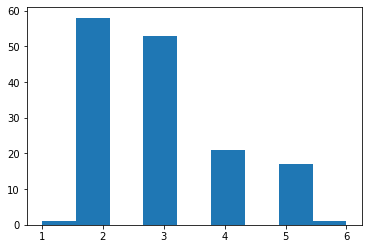

In [320]:
covered_numpy = np.zeros(N)
for index in range(N):
    covered_numpy[index] = number_covered(is_taken,index)

plt.hist(covered_numpy,bins='auto')
plt.show()

In [321]:
gloutonne(table_dist, list_target, 1.5, 2, list_neighbors,k=2)

TypeError: gloutonne() missing 1 required positional argument: 'list_neighbors'